In [35]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [36]:
data_shuffle_path = '../data/linear_data/linear_shuffle_data.npy'
data_scatter_path = '../data/linear_data/linear_scatter_data.npy'
data_true_path    = '../data/linear_data/linear_true_data.npy'

data_shuffle = np.load(data_shuffle_path)
data_scatter = np.load(data_scatter_path)
data_true = np.load(data_true_path)

In [37]:
epochs = 300
lr = 0.001
batch_size = 30

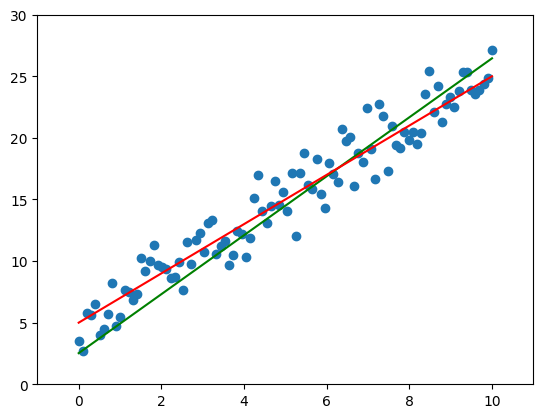

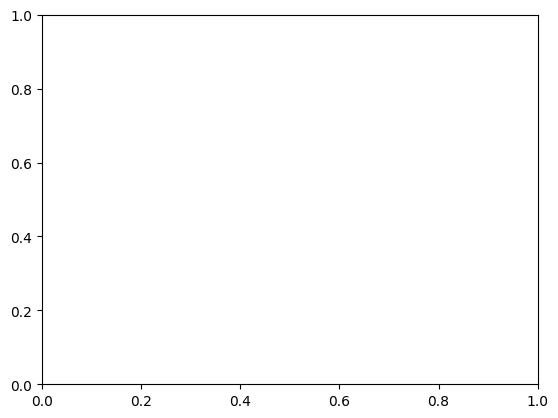

In [38]:
w = np.random.randn(1)
b = np.random.randn(1)
x_data = data_shuffle[:,0]
y_data = data_shuffle[:,1]
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlim(-1, 11)
ax.set_ylim(0, 25)
display(fig, display_id='plot')
for epoch in range(epochs):
    batch_count = 0
    grad_w_sum  = 0
    grad_b_sum  = 0
    for i in range(x_data.shape[0]):
        y = w * x_data[i] + b
        grad_w = 2 * (y_data[i] - y) * (-1) * x_data[i]
        grad_b = 2 * (y_data[i] - y) * (-1)
        batch_count = batch_count + 1
        if batch_count >= batch_size:
            grad_w_sum = grad_w_sum + grad_w
            grad_b_sum = grad_b_sum + grad_b
            w = w - lr * (grad_w_sum) / batch_size
            b = b - lr * (grad_b_sum) / batch_size
            grad_w_sum = 0
            grad_b_sum = 0
            batch_count = 0
        else:
            grad_w_sum = grad_w_sum + grad_w
            grad_b_sum = grad_b_sum + grad_b
        # w = w - lr * grad_w
        # b = b - lr * grad_b
        
    ax.set_xlim(-1, 11)
    ax.set_ylim(0, 30)
    ax.scatter(data_scatter[:,0], data_scatter[:,1])
    y_show = w * data_true[:,0] + b
    ax.plot(data_true[:,0], y_show, color='green')
    ax.plot(data_true[:,0], data_true[:,1], color='red')
    display(fig, display_id='plot',update=True)
    ax.clear()
    